## Predicting timbre by the Fourier transform


### Preface

Any periodic sound can be estimated by a sum of component frequencies, known as harmonics or overtones in music. After decomposing a sound into its components by the Fast Fourier Transform, we arrive at music’s spectral distribution, which displays the amount that each overtone contributes to the final sound. 

The spectral envelope interpolates the distribution to find a curve, which theoretically characterizes a performance's timbre. For instance, white noise’s spectral envelope would be a constant line, since every Fourier component appears in the final sound with equal magnitude.

### Intro

By analyzing a soundwave using the FFT, this widget helps interpolate the spectral distribution to create a rough model of a player's timbre. Still fine-tuning some of the normalization, but will perform modestly on a few bars (given that recordings are regular enough).

### Author

Daniel Zhao, La Canada High

### Transforming the data

In [2]:
# import necessary modules

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [3]:
import scipy.io.wavfile as wav

In [4]:
def transform(name):
    
    # read in the soundwave
    fs, data = wav.read(name)
    all_sound = data.T[0]
    
    #truncate the sound
    truncated = all_sound[:60000]
    
    # normalize for 16-bit wav file
    norm=[(ele/2**16.)*2-1 for ele in truncated]
    
    #apply the fft!
    return fft(norm)

### Including the fundamental frequency

In [ ]:
transformed1 = transform('test.wav')
transformed2 = transform('test2.wav')

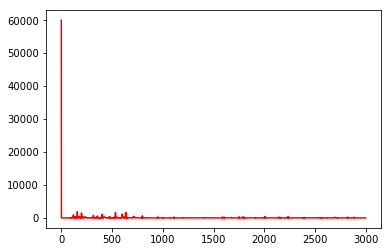

In [20]:
## plotting the real components, up to 3000

plt.plot(abs(transformed1[:3000]),'r') 
plt.show()

### Without fundamental frequency

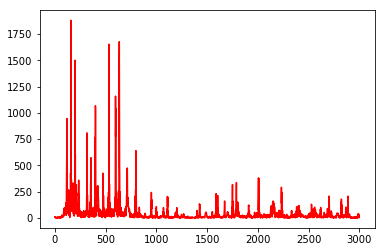

In [21]:
plt.plot(abs(transformed1[1:3000]),'r') 
plt.show()

The fundamental frequency is orders of magnitude larger than any of the other components.

In [22]:
## sampling freqency of our test.wav

fs = 44100

In [23]:
x = np.arange(3000)

In [24]:
interpolated1 = np.interp([1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 5999], x[1:], abs(transformed1[1:3000]))

In [25]:
interpolated2 = np.interp([1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 5999], x[1:], abs(transformed2[1:3000]))

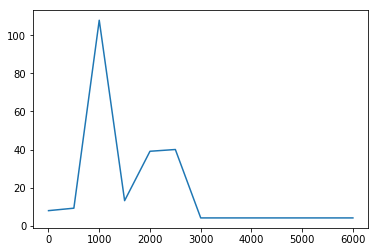

In [26]:
plt.plot([1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 5999], interpolated1)
plt.show()

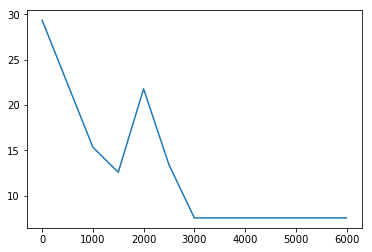

In [27]:
plt.plot([1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 5999], interpolated2)
plt.show()

Above, you can distinguish the two sounds by their spectral envelope.

### Predicting a player's timbre

For the same length samples, we can determine which cluster the sample is closest to by calculating the Euclidean norm. Which ever player's curve minimizes the distance is assumed to be the correct player; thus, we can predict timbre for multiple samples.

In [29]:
norms = np.array([])

In [ ]:
## list of norms

for s in samples:
    sample_trans = transform(s)
    norms.add(np.linalg.norm(sample_trans - transformed1))

In [31]:
## find the index of the correct waveform

### Listening to the music

Run these cells if you want to here what your waveform sounds like after being truncated/normalized!

In [ ]:
import sounddevice as sd

In [ ]:
## Listen to truncated version

sd.play(norm) 